# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/mindyng/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


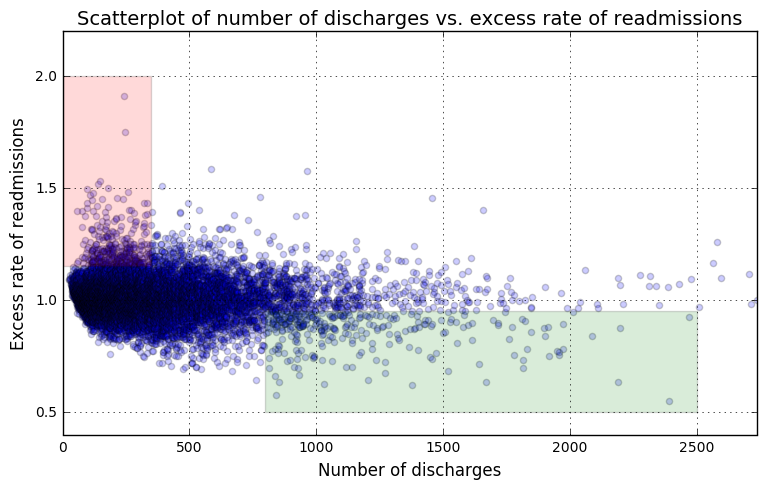

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

In [6]:
# Exercise

# Include your work on the following **in this notebook and submit to your Github account**. 

# A. Do you agree with the above analysis and recommendations? Why or why not?
   
# B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

#    1. Setup an appropriate hypothesis test.
#    2. Compute and report the observed significance value (or p-value).
#    3. Report statistical significance for alpha = .01. 
#    4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
#    5. Look at the scatterplot above. 
#       - What are the advantages and disadvantages of using this plot to convey information?
#       - Construct another plot that conveys the same information in a more direct manner.



# You can compose in notebook cells using Markdown: 
# In the control panel at the top, choose Cell > Cell Type > Markdown
# Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

In [7]:
#A

#I agree with part of the above analysis and recommendations. 
 
#Regarding initial observations based on the plot:    
    
#1. The overall rate of readmission does indeed trend down as number of discharges increase.
#This will be verifed by splitting discharge numbers into brackets. And for each bracket, I will count the frequency
#of readmissions. In the end, I will sort the frequencies from most discharges to least discharges from top to bottom.
#2. With lower number of discharges, there does seem to be a greater incidence of excess rate of readmissions (red area).
#This will be verified by printing out how many readmissions there are for discharges > 1000.
#3. With higher number of discharges, there is a greater incidence of lower rates of readmissions (green area).
#This will be verified by printing out how many readmissions there are for discharges < 1000.

#Regarding Statistics portion: 

# The cut-off points at 100 and 1000 give some information, but end up causing 
# all the data in between those cut-off points to be missing analysis. A better analysis
# will have 1000 as the threshold. 

In [8]:
#Some EDA
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [9]:
clean_hospital_read_df.shape

(11578, 12)

In [10]:
# There are many NaN's in our columns of interest:
# Excess Readmission Ratio, Predicted Readmission Rate, Expected Readmission Rate.
#If all NaN's were taken out, how many records would be extracted from the dataset?

In [11]:
len(clean_hospital_read_df) #how many records there are

11578

In [12]:
clean_hospital_read_df.count() #records per column

Hospital Name                 11578
Provider Number               11578
State                         11578
Measure Name                  11578
Number of Discharges          11578
Footnote                         81
Excess Readmission Ratio      11497
Predicted Readmission Rate    11497
Expected Readmission Rate     11497
Number of Readmissions        11497
Start Date                    11578
End Date                      11578
dtype: int64

In [13]:
len(clean_hospital_read_df)-clean_hospital_read_df.count() #records that have NaN values 

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio         81
Predicted Readmission Rate       81
Expected Readmission Rate        81
Number of Readmissions           81
Start Date                        0
End Date                          0
dtype: int64

In [14]:
#Let us see how many records will be taken out if all NaN rows were discarded. 

In [15]:
clean_hospital_read_df.dropna(subset = ['Excess Readmission Ratio', 'Predicted Readmission Rate', 'Number of Readmissions'], inplace = True)

In [16]:
11578-len(clean_hospital_read_df)

81

In [17]:
#81 is only 0.699602694% of the dataset. So it is not a significant reduction of data.

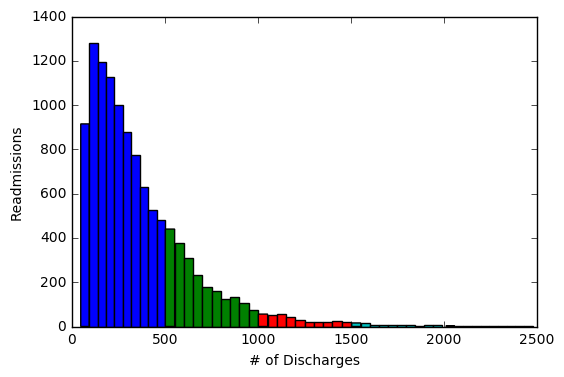

In [53]:
#A

#1. 

x1 = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3] if a > 0 and a<= 500]
x2 = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3] if a > 501 and a <= 1000]
x3 = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3] if a > 1001 and a <= 1500]
x4 = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3] if a > 1501 and a <= 2000]
x5 = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3] if a > 2001 and a <= 2500]

plt.hist(x1)
plt.hist(x2)
plt.hist(x3)
plt.hist(x4)
plt.hist(x5)

plt.xlabel("# of Discharges")
plt.ylabel("Readmissions")

In [ ]:
#As you can tell from the above patched set of 5 histograms, with each bracket of 500 discharges, there is a decline
#in the number of readmissions. This shows that the first claim from "Observations" is valid.

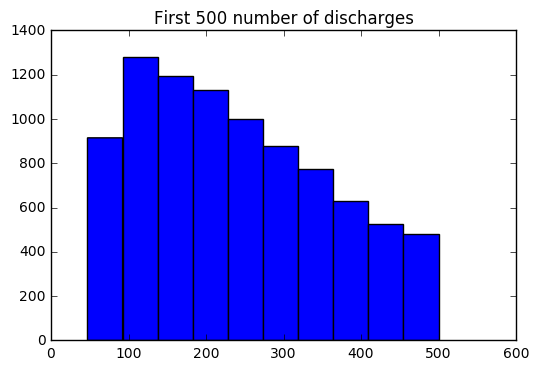

In [54]:
#2.

plt.hist(x1)
plt.title("First 500 number of discharges")

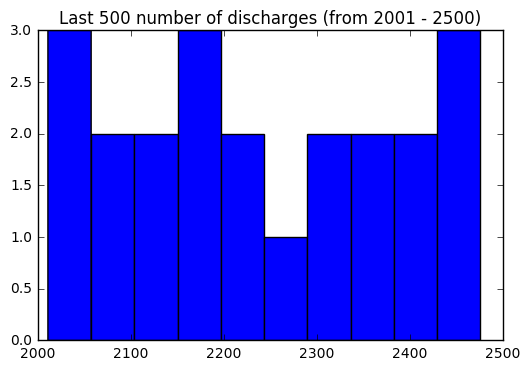

In [55]:
#3.
plt.hist(x5)
plt.title("Last 500 number of discharges (from 2001 - 2500)")

In [ ]:
#As you can tell from the two different histograms above, there are significant differences in number of readmissions.
#When looking at the y-axis, you can see that the range of numbers are drastically different.
#The first histogram ranges from 0-1300, whereas the second histogram ranges from 0-3.
#This means that with lower number of discharges, there is a greater incidence of excess rate of readmissions.
#And with higher number of discharges, there is a lower incidence of excess rate of readmissions.
#Therefore, this shows that the second claim and third claim from "Observations" are valid.

In [21]:
#Now let us verify the claims that were made under the 'Statistics' portion
#by calculating some statistics on our own.

In [22]:
#We start with the first claim.
clean_hospital_read_df['Excess Readmission Ratio'][clean_hospital_read_df['Number of Discharges']<100].mean()

1.0226183501683506

In [23]:
from __future__ import division

len(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']<100][clean_hospital_read_df['Excess Readmission Ratio']>1])/len(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']<100])

/Users/mindyng/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


0.6321548821548821

In [24]:
#We end with the second claim.
clean_hospital_read_df['Excess Readmission Ratio'][clean_hospital_read_df['Number of Discharges']>1000].mean()

0.9783354211663071

In [25]:
len(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>1000][clean_hospital_read_df['Excess Readmission Ratio']>1])/len(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>1000])

/Users/mindyng/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


0.4449244060475162

In [26]:
#Both claims are accurate. So there is nothing to critique here. 
#Now let us move on to our hypothesis test.

In [27]:
#B

#1

#Null Hypothesis: There is no difference between data point probability of excess readmissions greater than 1
# for discharges greater than 1000 and data point probability of excess readmissions greater than 1 for discharges
# less than 1000.

#Alternative Hypothesis: There is a difference between data point probability of excess readmissions greater than 1
# for discharges greater than 1000 and probability of excess readmissions greater than 1 for discharges
# less than 1000.

In [28]:
#In order to proceed, need to split the data at 1000 discharges.

less_than_1000 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']<1000]
above_1000 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>=1000]

In [29]:
#Getting respective proportion values relative to 1000 discharges.

p_gte1000 = len(above_1000[above_1000['Excess Readmission Ratio']>1])/len(above_1000)
p_le1000 = len(less_than_1000[less_than_1000['Excess Readmission Ratio']>1])/len(less_than_1000)
print(p_gte1000)
print(p_le1000)

0.443965517241
0.519622949334


In [30]:
# #Now we need to check to see if this distribution meets normal distribution
# #conditions in order to proceed with our analysis.
# #To do this, we would have to check to see if:
# 1.the sample size * proportion value >= 10
# 2.the sample size (1-proportion value) >= 10

In [31]:
print(len(above_1000)*p_gte1000)
print(len(less_than_1000)*p_le1000)

206.0
5733.0


In [32]:
#Both values are greater than 10. So we can assume that this data represents a normal distribution.

In [33]:
#2

#Given, we can get the p-value as follows:

from statsmodels.stats.proportion import proportions_ztest as pz

above = len(above_1000[above_1000['Excess Readmission Ratio']>1])
below = len(less_than_1000[less_than_1000['Excess Readmission Ratio']>1])

pz(np.array([above,below]),np.array([len(above_1000),len(less_than_1000)]),value=0)

(-3.194726821394656, 0.0013996325392907783)

In [34]:
#3 and 4

#Based on the p-value (the value to the right), which is smaller than the significance level of 0.01, there is strong evidence to reject the 
#Null Hypothesis in favor of the Alternative Hypothesis: There is a difference between data point probability of excess readmissions greater than 1
# for discharges greater than 1000 and probability of excess readmissions greater than 1 for discharges
# less than 1000.

#Statistical Significance: From the calculations above, with less than 1000 discharges, there is a
#higher excessive rate of readmission. 

#Practical Significance: Given, hospitals should improve their quality of care so that the number
#of discharges can rise with no readmissions. At the same time, decrease in excess readmission ratio
#would be ideal as well by having patients possibly comply with their prescription.

(array([ 6048.,  3415.,  1227.,   464.,   171.,    93.,    40.,    17.,
           10.,     9.]),
 array([   25. ,   296.5,   568. ,   839.5,  1111. ,  1382.5,  1654. ,
         1925.5,  2197. ,  2468.5,  2740. ]),
 <a list of 10 Patch objects>)

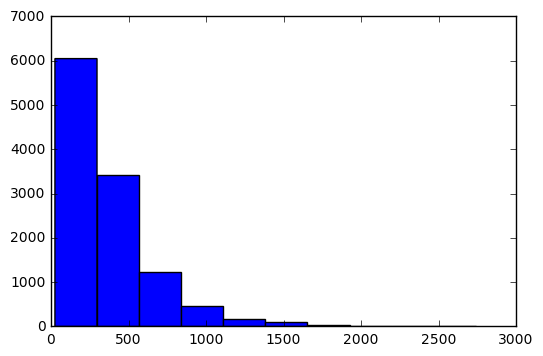

In [35]:
#5

#The advantage of using the scatterplot above is to see where the data points are 
#concentrated. At the same time, scatterplots are best to see correlation between the x and y-axes.
#Thus, the disadvantage here is that given the large amount of data points focused in one area, this makes 
#it hard to tell the relationship between many points since there is a lot of overlap between points.

#In order to show a more direct relationship between the x- and y- axis, a histogram would be a
#good visualization to convey the data's information in a more direct manner. Separating out the frequency of 
# x-axis data and the y-axis data would help give a direct conclusion on where points are concentrated. 
# The following plots allow us to see the frequency within each discharge group and the frequency within each 
#excess readmission ratio.

plt.hist(x)

(array([  1.40000000e+01,   1.92000000e+02,   2.90900000e+03,
          6.77000000e+03,   1.40500000e+03,   1.57000000e+02,
          3.90000000e+01,   6.00000000e+00,   1.00000000e+00,
          1.00000000e+00]),
 array([ 0.5495,  0.6855,  0.8215,  0.9575,  1.0935,  1.2295,  1.3655,
         1.5015,  1.6375,  1.7735,  1.9095]),
 <a list of 10 Patch objects>)

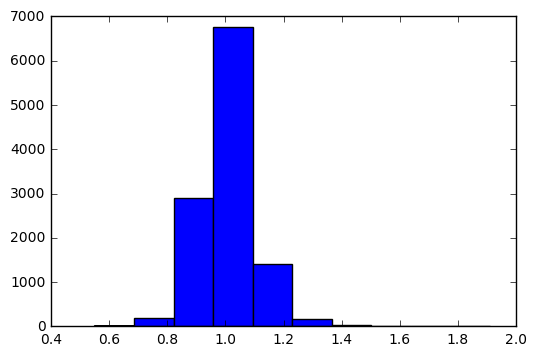

In [36]:
# The histogram below shows the count for each ratio result (hospital’s number of “predicted” 30-day 
# readmissions for heart attack, heart failure, and pneumonia divided by the number that would be 
# “expected,” based on an average hospital with similar patients)

plt.hist(y)

In [37]:
# Based on these two different histograms, we can see more clearly the frequency of discharges decrease significantly
#after 1000. Also, we can see that there is a high concentration of excessive admission rates concentrated at 1.0,
# but there are significant numbers at 0.8 abd 1.2.

(0.5, 1.2)

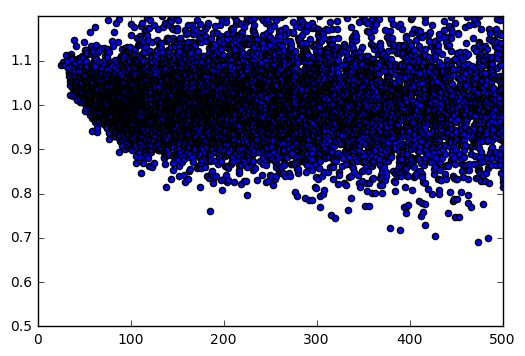

In [57]:
#In order to show a more direct relationship between the x- and y- axis, we could zoom in and out of convoluted areas of
#the original graph. For example, in order to get a more granular depiction of dense areas of the original plot, I could 
# cut off the x-axis to values less than 500 and cut off y-axis values to those values between 0.5 and 1.2 with the same 
#adjustment on the x-axis. 

plt.scatter(x, y)

plt.xlim([0,500])
plt.ylim([0.5,1.2])